# Read theta array from encoder readout
- Angular information (theta array) is required for accurate tomographic reconstruction.
- If theta is not stored in the raw data, it is possible to simulate it as equally spaced between 0 and 180 degrees.
- Alternatively, we can read the rotation stage encoder readout during the scan (beta)

### A. Load `theta` array stored in the `HDF5` dataset
This is a calculated array of the ideal angles during the scan.

In [ ]:
h5file = "/mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5"
projs, _, _, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, sino=(695, 705, 1))

In [ ]:
print("Theta array size: ", theta.shape[:])

### B. Simulate `theta` array
If `theta` is empty, we can retrieve it using the `tomopy.angles` method:

In [18]:
theta_tomopy = tomopy.angles(projs.shape[0])

### C. Read `theta_readout` from encoder
Another option is to read the angle readout from the rotation stage:

In [ ]:
theta_readout = dxchange.read_hdf5(h5file, '/exchange/theta_readout')

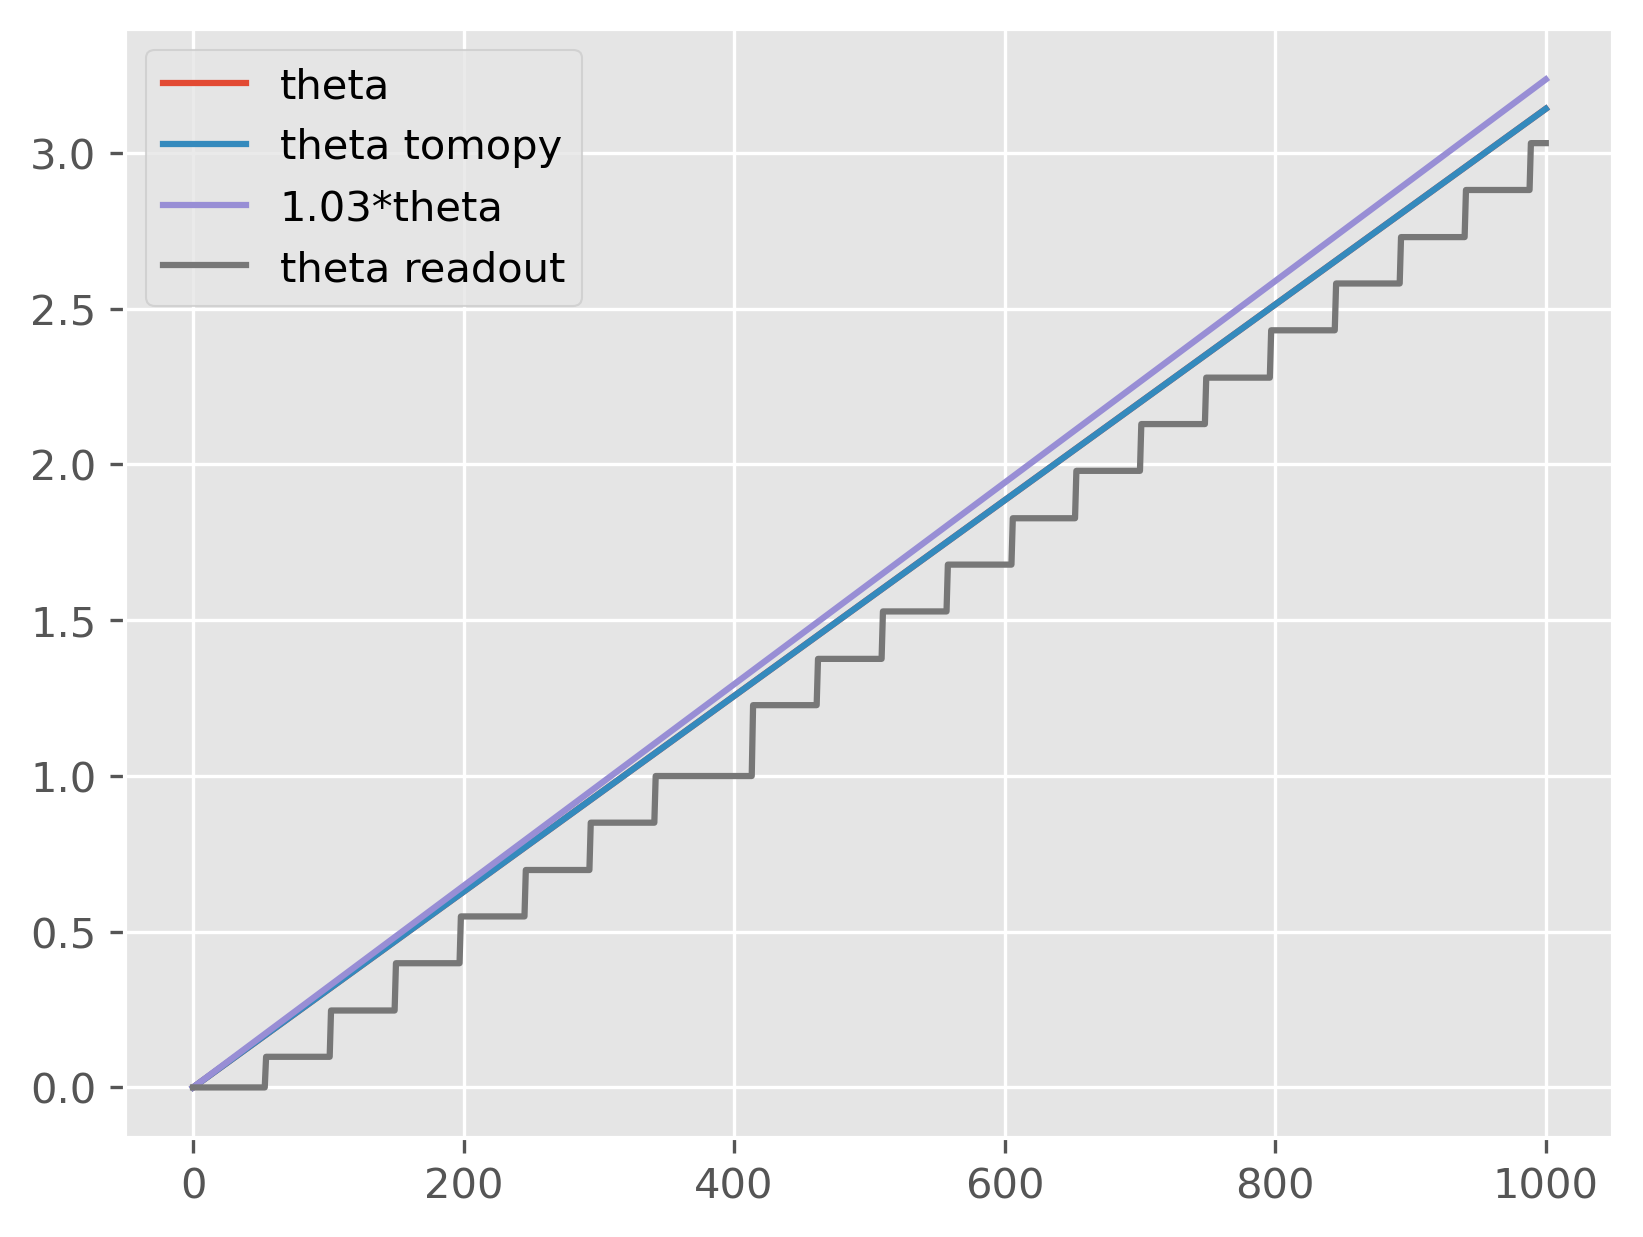

In [13]:
plt.plot(theta, label='theta')
plt.plot(theta_tomopy, label='theta tomopy')
# plt.plot(1.03*theta, label='1.03*theta')
plt.plot(theta_readout/180*np.pi, label='theta readout')
plt.legend()